In [1]:
import numpy as np
from pdf2image import convert_from_path
import cv2
from classes import HorizontalLines, VerticalLines, WireHoriz, WireVert
from skimage.feature import peak_local_max, match_template
from skimage.transform import probabilistic_hough_line, rotate
from io_1 import importImage
from testing import wireScanHough

ModuleNotFoundError: No module named 'pdf2image'

In [2]:
images = convert_from_path('test_cable.pdf', 500)
for i, image in enumerate(images):
    image.save(f'test_cable_{i + 1}.png', 'PNG')

In [19]:
image = importImage("output_page_2.png")
HorizWires, VertWires = wireScanHough(image)

Hough transmation iter: 100%|██████████| 100/100 [00:14<00:00,  6.85it/s]


In [ ]:
import cv2

image = cv2.imread('output_page_2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, close_kernel, iterations=1)

dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
dilate = cv2.dilate(close, dilate_kernel, iterations=1)

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area > 800 and area < 15000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (222,228,251), -1)

cv2.imshow('image', image)
cv2.waitKey()

In [1]:
import cv2
image = cv2.imread('output_page_2.png')

In [9]:
img = cv2.resize(image, (int(image.shape[1] * 0.50), int(image.shape[0] * 0.50)))
cv2.imwrite("nice.jpg", img)

True

In [2]:
(5, 3) + 1

TypeError: can only concatenate tuple (not "int") to tuple

In [4]:
np.array((1, 2)).shape

(2,)

In [8]:
import keras_ocr
from keras_ocr import pipeline

In [10]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /Users/michaelcampos/.keras-ocr/craft_mlt_25k.h5


2025-01-08 20:53:04.855454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-08 20:53:04.856020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-08 20:53:04.856525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Looking for /Users/michaelcampos/.keras-ocr/crnn_kurapan.h5


2025-01-08 20:53:05.095630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'lambda_7/scan/while/Fill/lambda_7/stack_1' with dtype int32 and shape [1]
	 [[{{node lambda_7/scan/while/Fill/lambda_7/stack_1}}]]
2025-01-08 20:53:05.095672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'lambda_7/scan/while/Fill/lambda_7/stack_1' with dtype int32 and shape [1]
	 [[{{node lambda_7/scan/while/Fill/lambda_7/stack_1}}]]


In [11]:
image = keras_ocr.tools.read("output_page_2.png")

In [13]:
prediction = pipeline.recognize([image])

2025-01-08 20:54:24.411551: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 6s 6s/step


2025-01-08 20:54:31.152839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-08 20:54:31.153672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-08 20:54:31.154227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

17/17 [==============================] - 16s 884ms/step


<Axes: >

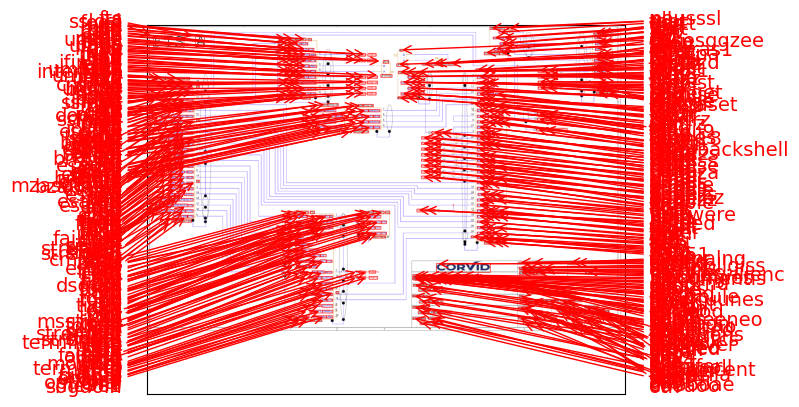

In [20]:
keras_ocr.tools.drawAnnotations(image=image, predictions=prediction[0])

In [21]:
annotated_image = keras_ocr.tools.drawBoxes(image=image, boxes=prediction[0], boxes_format="predictions")

In [22]:
annotated_image_bgr = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [25]:
import cv2
cv2.imwrite("annotated_sch.jpg", annotated_image)

True